## MD NVE - Funzione di distribuzione radiale $g(r)$

Per calcolare la funzione di distribuzione radiale, durante ciascuna simulazione è stato realizzato un istogramma con $N_{bin}$ bin di dimensione $dr=\frac{L}{2N_{bin}}$, dove $L$ è il lato della scatola (che varia a seconda della densità del sistema. $N_{bin}$ è stato scelto pari a $100$ nel caso del solido e del liquido e pari a $150$ per il gas. Di seguito si riportano i grafici della $g(r)$ e relativi errori (ottenuti tramite metodo del blocking) in unità del SI di Argon e Krypton per ciascuna delle tre fasi termodinamiche. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from decimal import Decimal as d

In [2]:
# ARGON: unità di misura SI
sigma_A = 0.34*10**(-9) # m

# KRYPTON: unità SI
sigma_K = 0.364*10**(-9) # m

n_part = 108. # particle's numbers

### Solido

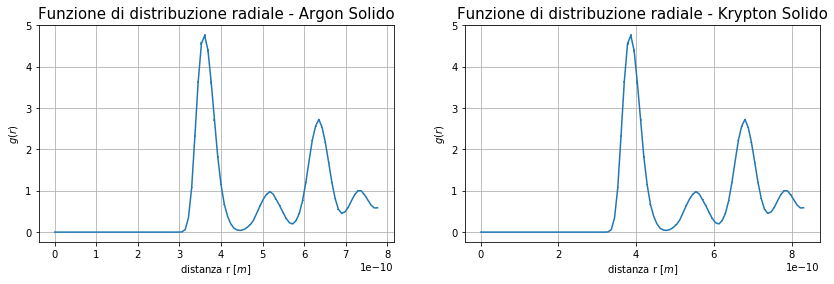

In [3]:
gdr_s, err_gdr_s = np.loadtxt("Solid/gdr/gave.txt", usecols=(1,2), unpack = 'true')

rho = 1.1

n_bins = len(gdr_s)
bin_size = (n_part/rho)**(1.0/3.0)/2.0/n_bins
r_s = np.arange(n_bins)*bin_size

sigma = [sigma_A,sigma_K]
title = ['Argon ','Krypton ']

f = plt.figure(figsize=(14,4))
for i in range(2):
    f.add_subplot(1,2,i+1)
    plt.errorbar(r_s*sigma[i],gdr_s,err_gdr_s)
    plt.xlabel('distanza r $[m]$')
    plt.ylabel('$g(r)$')
    plt.title('Funzione di distribuzione radiale - '+title[i]+'Solido',size=15)
    plt.grid()

plt.show()

A brevi distanze ($r<1$ in unità ridotte), dove prevale la repulsione di core, la $g(r)$ è nulla. Successivamente, picchi ben definiti si alternano a zone in cui la probabilità di trovare una particella è praticamente nulla. Questo andamento della funzione di distribuzione radiale riflette la struttura cristallina del solido, in cui le particelle si trovano quasi esclusivamente in prossimità dei siti del reticolo. I picchi non ma non si ripresentano identici ad intervalli regolari poichè la funzione di distribuzione radiale è funzione della sola distanza, mentre il solido rompe la simmetria roto-traslazionale continua. Per osservare picchi identici ad intervalli regolari bisognerebbe calcolare la funzione di distribuzione lungo una direzione precisa.

### Liquido

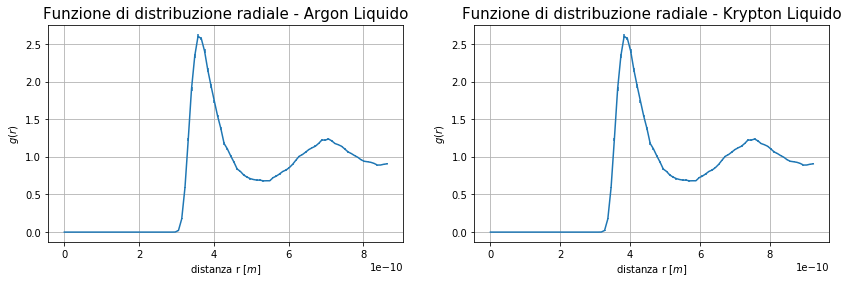

In [4]:
gdr_l, err_gdr_l = np.loadtxt("Liquid/gdr/gave.txt", usecols=(1,2), unpack = 'true')

rho = 0.8

n_bins = len(gdr_l)
bin_size = (n_part/rho)**(1.0/3.0)/2.0/n_bins
r_l = np.arange(n_bins)*bin_size

sigma = [sigma_A,sigma_K]
title = ['Argon ','Krypton ']

f = plt.figure(figsize=(14,4))
for i in range(2):
    f.add_subplot(1,2,i+1)
    plt.errorbar(r_l*sigma[i],gdr_l,err_gdr_l)
    plt.xlabel('distanza r $[m]$')
    plt.ylabel('$g(r)$')
    plt.title('Funzione di distribuzione radiale - '+title[i]+'Liquido',size=15)
    plt.grid()

plt.show()

Anche nel caso del liquido la $g(r)$ è nulla a brevi distanze ed è presente un primo picco più o meno alla stessa distanza del primo picco del solido. Il picco è dovuto alla presenza della prima shell di particelle (che è abbastanza simile a quella del solido). Al primo picco segue una zona con meno particelle (che dipende dalla distanza media tra due particelle in un liquido) e quindi un altro picco, più basso e largo del primo, che corrisponde alla seconda shell. Simulando un sistema più grande si potrebbero osservare ulteriori picchi, sempre più larghi e con altezza sempre più prossima a 1. A distanze sufficientemente grandi, infatti, la probabilità di trovare una coppia di particelle ad una data distanza è molto simile a quella di un gas ideale.

### Gas

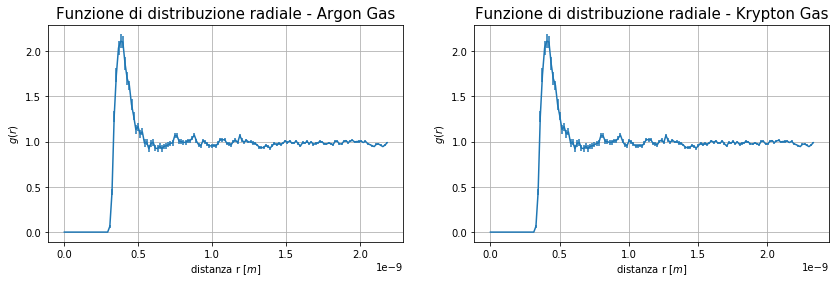

In [6]:
gdr_g, err_gdr_g = np.loadtxt("Gas/gdr/gave.txt", usecols=(1,2), unpack = 'true')

rho = 0.05

n_bins = len(gdr_g)
bin_size = (n_part/rho)**(1.0/3.0)/2.0/n_bins
r_g = np.arange(n_bins)*bin_size

sigma = [sigma_A,sigma_K]
title = ['Argon ','Krypton ']

f = plt.figure(figsize=(14,4))
for i in range(2):
    f.add_subplot(1,2,i+1)
    plt.errorbar(r_g*sigma[i],gdr_g,err_gdr_g)
    plt.xlabel('distanza r $[m]$')
    plt.ylabel('$g(r)$')
    plt.title('Funzione di distribuzione radiale - '+title[i]+'Gas',size=15)
    plt.grid()

plt.show()

Come nei casi precedenti, la $g(r)$ del gas è nulla per piccole distanze e presenta un piccolo picco. Questo si estende per $0.5 \sigma$ e successivamente la $g(r)$ raggiunge il valore 1 (gas ideale), attorno al quale fluttua per tutte le distanze successive. Le correlazioni spaziali del gas di L-J, dovute alla debole interazione attrattiva, decadono quindi abbastanza velocemente.

Di seguito sono mostrate le tre funzioni di distribuzioni radiali, in unità ridotte, a confronto.

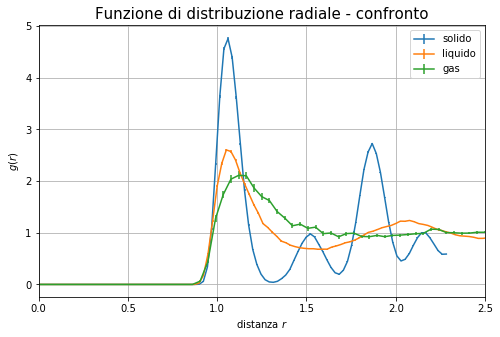

In [74]:
r = [r_s,r_l,r_g]
gdr = [gdr_s,gdr_l,gdr_g]
err = [err_gdr_s,err_gdr_l,err_gdr_g]
label = ['solido','liquido','gas']

f = plt.figure(figsize=(8,5))
for i in range(3):
    plt.errorbar(r[i],gdr[i],err[i],label = label[i] )

plt.xlabel('distanza $r$')
plt.ylabel('$g(r)$')
plt.title('Funzione di distribuzione radiale - confronto',size=15)
plt.xlim(0,2.5)
plt.legend()
plt.grid()

plt.show()